In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(0)

**Why Use np.random.seed(0)?**



Consistent Results: By fixing the seed, the random number generator produces the same sequence of numbers each time the code is run. This ensures that the results are consistent across different runs, making debugging and verification easier.

Fair Comparison: When comparing different models or algorithms, it's essential to start with the same initial conditions. Setting a seed ensures that the randomness (like initial weights, random sampling, etc.) is controlled, allowing a fair comparison.

Debugging: Identifying issues and debugging becomes more manageable when the results are reproducible. It allows you to pinpoint where things might be going wrong.

Without seed:
X1: [0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
X2: [0.64589411 0.43758721 0.891773   0.96366276 0.38344152]

With seed:
X3: [0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
X4: [0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]

In the example, setting the seed ensures that X3 and X4 are identical, demonstrating reproducibility. Without setting the seed, X1 and X2 are different on each run, making results inconsistent.

In [2]:
# Generate 1000 random X points
X = np.random.rand(1000)

# Calculate Y points
Y = 2 * (X ** 2) + 3 * X + 5

# Define the loss function
def loss_function(Y, Y_pred):
    return np.mean((Y - Y_pred) ** 2)

# Initialize parameters
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()

# Why Use Epochs

**Incremental Learning**

In each epoch, the model goes through the entire dataset once. This allows the model to gradually learn the underlying patterns in the data.

By repeating the training process multiple times, the model can make incremental updates to the parameters, improving the fit to the data.

**Convergence**

Gradient descent algorithms typically do not converge to the optimal solution in a single pass through the data.

Multiple epochs allow the algorithm to iteratively adjust the parameters, reducing the loss function step by step until it converges to a minimum.

**Overcoming Local Minima**

The loss surface may have multiple local minima. By training for multiple epochs, the model has a better chance of escaping local minima and finding a more optimal solution.

**Improving Accuracy**

Early epochs might result in significant reductions in the loss, but the improvements become smaller as training progresses.

Sufficient epochs ensure the model parameters are fine-tuned to achieve higher accuracy.

In [3]:
# Set learning rate and epochs
learning_rate = 0.1
epochs = 1000
patience = 10  # Early stopping patience
min_improvement = 1e-5  # Minimum improvement threshold

## The problems you might face with too few or too many epochs

**Too few epochs (low value)**


Underfitting: The model may not have enough time to learn the patterns in the data, resulting in poor performance on both training and test sets.

High bias: The model might be too simplistic and fail to capture the underlying relationships in the data.

Incomplete convergence: The optimization process may not reach the optimal point, leading to suboptimal model parameters.

Inconsistent results: With very few epochs, the model's performance can be highly variable between different training runs.


**Too many epochs (high value)**


Overfitting: The model may start to memorize the training data, leading to poor generalization on unseen data.

High variance: The model becomes too complex and starts to fit noise in the training data.

Increased computational cost: More epochs require more time and resources to train the model.

Diminishing returns: After a certain point, additional epochs may not significantly improve performance, wasting computational resources.

Potential instability: In some cases, excessive training can lead to oscillations or divergence in the optimization process.

In [4]:
# Store loss values
losses = []
best_loss = float('inf')
patience_counter = 0


**Why Use float('inf')?**

Initial Comparison: At the start, best_loss needs to be a value that any real loss value will be lower than. Infinity guarantees this because any finite number is less than infinity.

Updating Best Loss: Once the first epoch is completed, the loss value is compared against infinity and will always be smaller, thus updating best_loss to the first calculated loss value. This ensures that best_loss always holds the lowest loss encountered so far.

**Issues with Negative Infinity**

If best_loss is initialized to negative infinity, any calculated loss (which will be a finite positive number or zero) will be greater than negative infinity.

The condition if loss < best_loss (which we use to update the best loss) will never be true because no real loss value will be less than negative infinity.

Since the condition to update best_loss is never met, best_loss remains negative infinity.

The training process would not correctly track the minimum loss, and the logic relying on the best loss for early stopping or other purposes would be faulty.

In [5]:
# Gradient descent loop
for epoch in range(epochs):
    # Predict Y using the current parameters
    Y_pred = a * (X ** 2) + b * X + c
    
    # Calculate the loss
    loss = loss_function(Y, Y_pred)
    losses.append(loss)
    
    # Print the current epoch and loss
    print(f'Epoch {epoch + 1}, Loss: {loss}')
    
    # Check for early stopping based on minimum improvement
    if best_loss - loss > min_improvement:
        best_loss = loss
        patience_counter = 0
    else:
        patience_counter += 1
        
    if patience_counter >= patience:
        print(f'Early stopping at epoch {epoch + 1}')
        break
    
    # Calculate gradients
    dL_da = -2 * np.mean((Y - Y_pred) * (X ** 2))
    dL_db = -2 * np.mean((Y - Y_pred) * X)
    dL_dc = -2 * np.mean(Y - Y_pred)
    
    # Update parameters
    a -= learning_rate * dL_da
    b -= learning_rate * dL_db
    c -= learning_rate * dL_dc

Epoch 1, Loss: 30.55923241046619
Epoch 2, Loss: 15.89799892249081
Epoch 3, Loss: 8.305742952237983
Epoch 4, Loss: 4.37237795161445
Epoch 5, Loss: 2.3329357352870113
Epoch 6, Loss: 1.2739123843340432
Epoch 7, Loss: 0.7224967387968035
Epoch 8, Loss: 0.43396740026081854
Epoch 9, Loss: 0.2816557943966371
Epoch 10, Loss: 0.1999943414918051
Epoch 11, Loss: 0.1550398828389383
Epoch 12, Loss: 0.1292174739474014
Epoch 13, Loss: 0.11342421274552869
Epoch 14, Loss: 0.10294240136585156
Epoch 15, Loss: 0.09532430524454008
Epoch 16, Loss: 0.0892973524889253
Epoch 17, Loss: 0.08419748320156031
Epoch 18, Loss: 0.07967585406788817
Epoch 19, Loss: 0.07554702410351533
Epoch 20, Loss: 0.07171036745761344
Epoch 21, Loss: 0.06810938696892907
Epoch 22, Loss: 0.06471064461113142
Epoch 23, Loss: 0.061492845620130666
Epoch 24, Loss: 0.05844117840360249
Epoch 25, Loss: 0.0555443752002293
Epoch 26, Loss: 0.05279318140651755
Epoch 27, Loss: 0.050179554452633966
Epoch 28, Loss: 0.04769624071281471
Epoch 29, Loss: 0

**Early Stopping:** The loop monitors the loss and stops training if there is no improvement after a certain number of epochs (patience).

**Patience:** If the loss doesn't improve for patience consecutive epochs, training stops.

**Loss Plot:** The loss plot shows the loss over the epochs, demonstrating the effect of early stopping.

**Minimum Improvement Threshold:** A small threshold (min_improvement) is set to ensure that the loss must improve by at least this amount to reset the patience counter.

**Detailed Monitoring:** Prints the loss at each epoch and will indicate if early stopping occurs.

Final values - a: 2.1725580184897906, b: 2.8079775242750684, c: 5.038953560209342


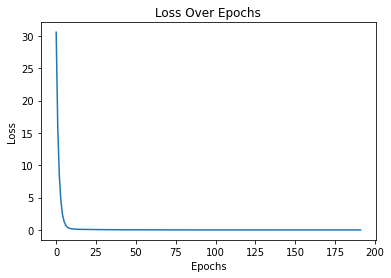

In [6]:
# Print the final values of a, b, and c
print(f'Final values - a: {a}, b: {b}, c: {c}')

# Plot the loss over epochs
plt.plot(range(len(losses)), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.show()

**Convergence**

Convergence in the context of machine learning and optimization algorithms refers to the point where the model's parameters have stabilized and the loss function (or error) stops decreasing significantly with further iterations. In simpler terms, it means the model has learned the underlying patterns in the data as well as it can, and further training won't yield substantial improvements.

**Why Convergence Matters:**

Efficient Training: It indicates that the model has learned the data sufficiently, so we can stop training to save computational resources.
Avoid Overfitting: Continued training beyond convergence can lead to overfitting, where the model starts memorizing the training data instead of generalizing to new, unseen data.
Model Performance: Convergence helps in achieving the best possible performance on the training data, which is crucial for the model's predictive capability.